## Data: Hyperspectral Remote Sensing Scenes
> http://www.ehu.eus/ccwintco/index.php?title=Hyperspectral_Remote_Sensing_Scenes

**Indian Pines**

This scene was gathered by AVIRIS sensor over the Indian Pines test site in North-western Indiana and consists of $145\times145$ pixels and 224 spectral reflectance bands in the wavelength range 0.4–2.5 10^(-6) meters. This scene is a subset of a larger one. The Indian Pines scene contains two-thirds agriculture, and one-third forest or other natural perennial vegetation. There are two major dual lane highways, a rail line, as well as some low density housing, other built structures, and smaller roads. Since the scene is taken in June some of the crops present, corn, soybeans, are in early stages of growth with less than 5% coverage. The ground truth available is designated into sixteen classes and is not all mutually exclusive. We have also reduced the number of bands to 200 by removing bands covering the region of water absorption: [104-108], [150-163], 220. Indian Pines data are available through Pursue's univeristy MultiSpec site.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from scipy.io import loadmat
indian_pines = loadmat('dataset/Indian_pines_corrected.mat')

In [2]:
# loadmat方法加载数据后会返回一个Python字典的数据结构
indian_pines.keys()

dict_keys(['__header__', '__version__', '__globals__', 'indian_pines_corrected'])

In [3]:
# 由关键字可知，读取'indian_pines_corrected'字段
indian_pines = indian_pines['indian_pines_corrected']
indian_pines.shape

(145, 145, 200)

In [4]:
# numpy.ndarray类型
type(indian_pines)

numpy.ndarray

In [5]:
indian_pines[:,:,0].shape

(145, 145)

In [6]:
indian_pines.max()

9604

In [7]:
indian_pines.min()

955

In [8]:
indian_pines

array([[[3172, 4142, 4506, ..., 1057, 1020, 1020],
        [2580, 4266, 4502, ..., 1064, 1029, 1020],
        [3687, 4266, 4421, ..., 1061, 1030, 1016],
        ...,
        [2570, 3890, 4320, ..., 1042, 1021, 1015],
        [3170, 4130, 4320, ..., 1054, 1024, 1020],
        [3172, 3890, 4316, ..., 1043, 1034, 1016]],

       [[2576, 4388, 4334, ..., 1047, 1030, 1006],
        [2747, 4264, 4592, ..., 1055, 1039, 1015],
        [2750, 4268, 4423, ..., 1047, 1026, 1015],
        ...,
        [3859, 4512, 4605, ..., 1056, 1035, 1015],
        [3686, 4264, 4690, ..., 1051, 1012, 1020],
        [2744, 4268, 4597, ..., 1047, 1019, 1016]],

       [[2744, 4146, 4416, ..., 1055, 1029, 1025],
        [2576, 4389, 4416, ..., 1051, 1021, 1011],
        [2744, 4273, 4420, ..., 1068, 1033, 1010],
        ...,
        [2570, 4266, 4509, ..., 1051, 1025, 1010],
        [2576, 4262, 4496, ..., 1047, 1029, 1020],
        [2742, 4142, 4230, ..., 1042, 1025, 1011]],

       ...,

       [[3324, 3728, 400

In [9]:
indian_pines_gt = loadmat('dataset/Indian_pines_gt.mat')
print(indian_pines_gt.keys())

dict_keys(['__header__', '__version__', '__globals__', 'indian_pines_gt'])


In [10]:
indian_pines_gt = indian_pines_gt['indian_pines_gt']
indian_pines_gt.shape

(145, 145)

In [11]:
indian_pines_gt

array([[3, 3, 3, ..., 0, 0, 0],
       [3, 3, 3, ..., 0, 0, 0],
       [3, 3, 3, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [12]:
np.unique(indian_pines_gt)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16],
      dtype=uint8)

In [13]:
pd.DataFrame(indian_pines_gt)

,0,1,2,3,4,5,6,7,8,9,...,135,136,137,138,139,140,141,142,143,144
0,3,3,3,3,3,3,3,3,3,3,...,0,0,0,0,0,0,0,0,0,0
1,3,3,3,3,3,3,3,3,3,3,...,0,0,0,0,0,0,0,0,0,0
2,3,3,3,3,3,3,3,3,3,3,...,0,0,0,0,0,0,0,0,0,0
3,3,3,3,3,3,3,3,3,3,3,...,0,0,0,0,0,0,0,0,0,0
4,3,3,3,3,3,3,3,3,3,3,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
141,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
142,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
143,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
indian_pines_gt.ravel().shape

(21025,)

## 读取数据

In [50]:
X = indian_pines
y = indian_pines_gt
print(f"X shape: {X.shape}\ny shape: {y.shape}")

X shape: (145, 145, 200)
y shape: (145, 145)


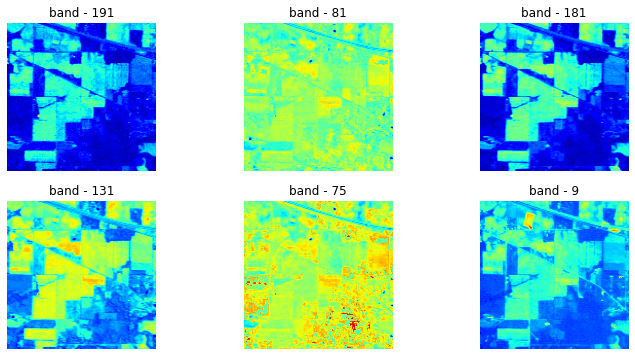

In [16]:
import seaborn as sns
sns.axes_style('whitegrid')
fig = plt.figure(figsize=(12, 6))

for i in range(1, 1+6):
    fig.add_subplot(2, 3, i)
    q = np.random.randint(X.shape[2])
    plt.imshow(X[:, :, q], cmap='jet')
    plt.axis('off')
    plt.title(f'band - {q}')

### 查看图像的真实标注

In [51]:
!pip install plotly
import plotly.express as px

cls = px.imshow(y, color_continuous_scale='jet')

cls.update_layout(title='Ground Truth', coloraxis_showscale=True)
cls.update_xaxes(showticklabels=False)
cls.update_yaxes(showticklabels=False)
cls.show()

### 将图像转换为CSV存储

In [18]:
def extract_pixels(X, y, save_name='indian_pines_all'):
    q = X.reshape(-1, X.shape[2])
    df = pd.DataFrame(q)
    df = pd.concat([df, pd.DataFrame(y.ravel())], axis=1)
    df.columns= [f'band{i}' for i in range(1, 1+X.shape[2])]+['class']
    df.to_csv(f'dataset/{save_name}.csv')
    
    return df

In [19]:
df = extract_pixels(X, y, save_name='indian_pines_all')
df

,band1,band2,band3,band4,band5,band6,band7,band8,band9,band10,...,band192,band193,band194,band195,band196,band197,band198,band199,band200,class
0,3172,4142,4506,4279,4782,5048,5213,5106,5053,4750,...,1094,1090,1112,1090,1062,1069,1057,1020,1020,3
1,2580,4266,4502,4426,4853,5249,5352,5353,5347,5065,...,1108,1104,1117,1091,1079,1085,1064,1029,1020,3
2,3687,4266,4421,4498,5019,5293,5438,5427,5383,5132,...,1111,1114,1114,1100,1065,1092,1061,1030,1016,3
3,2749,4258,4603,4493,4958,5234,5417,5355,5349,5096,...,1122,1108,1109,1109,1071,1088,1060,1030,1006,3
4,2746,4018,4675,4417,4886,5117,5215,5096,5098,4834,...,1110,1107,1112,1094,1072,1087,1052,1034,1019,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21020,2561,3987,4011,4023,4201,4377,4418,4248,4180,3838,...,1013,1012,1018,1015,1011,1001,1000,1009,1008,0
21021,2726,4104,4024,3880,4210,4377,4413,4174,4229,3900,...,1012,1014,1012,1024,998,1010,1006,1000,1000,0
21022,3153,3864,4282,3889,4310,4372,4375,4208,4096,3878,...,1016,1015,1016,1021,1008,1019,1003,1008,1000,0
21023,3155,4104,4106,4027,4139,4318,4413,4174,4140,3933,...,1005,1011,1008,1012,1014,1007,1011,1005,1003,0


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21025 entries, 0 to 21024
Columns: 201 entries, band1 to class
dtypes: uint16(200), uint8(1)
memory usage: 8.0 MB


In [21]:
df.iloc[:, :-1].describe()

,band1,band2,band3,band4,band5,band6,band7,band8,band9,band10,...,band191,band192,band193,band194,band195,band196,band197,band198,band199,band200
count,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,...,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000
mean,2957.363472,4091.321237,4277.502259,4169.956671,4516.678668,4790.595149,4848.317574,4714.732509,4668.904828,4439.065541,...,1079.310773,1061.927848,1060.210273,1063.276813,1050.048514,1040.201141,1043.370321,1030.194816,1015.571463,1008.513579
std,354.918708,230.390005,257.827640,280.761254,346.035984,414.382138,469.247667,491.728349,533.232855,539.908195,...,49.943791,38.843805,38.712195,41.920969,34.242725,26.452672,29.794418,20.865106,11.386402,7.050921
min,2560.000000,2709.000000,3649.000000,2810.000000,3840.000000,4056.000000,4004.000000,3865.000000,3775.000000,2792.000000,...,998.000000,998.000000,999.000000,999.000000,993.000000,990.000000,992.000000,989.000000,986.000000,981.000000
25%,2602.000000,3889.000000,4066.000000,3954.000000,4214.000000,4425.000000,4421.000000,4263.000000,4173.000000,3940.000000,...,1031.000000,1026.000000,1024.000000,1024.000000,1019.000000,1016.000000,1016.000000,1012.000000,1006.000000,1004.000000
50%,2780.000000,4106.000000,4237.000000,4126.000000,4478.000000,4754.000000,4808.000000,4666.000000,4632.000000,4404.000000,...,1068.000000,1053.000000,1052.000000,1054.000000,1043.000000,1033.000000,1035.000000,1026.000000,1014.000000,1009.000000
75%,3179.000000,4247.000000,4479.000000,4350.000000,4772.000000,5093.000000,5198.000000,5100.000000,5084.000000,4860.000000,...,1129.000000,1099.000000,1098.000000,1104.000000,1083.000000,1066.000000,1072.000000,1050.000000,1024.000000,1014.000000
max,4536.000000,5744.000000,6361.000000,6362.000000,7153.000000,7980.000000,8284.000000,8128.000000,8194.000000,7928.000000,...,1364.000000,1287.000000,1289.000000,1315.000000,1258.000000,1201.000000,1245.000000,1167.000000,1076.000000,1036.000000


## PCA

由于HSI数据集具有较高的维度，因此难以处理庞大的数据。 因此，使用主成分分析（PCA）将数据的维数缩减为3D，这是一种流行且广泛使用的降维技术。 以下代码用于将数据集的尺寸减少为三个。

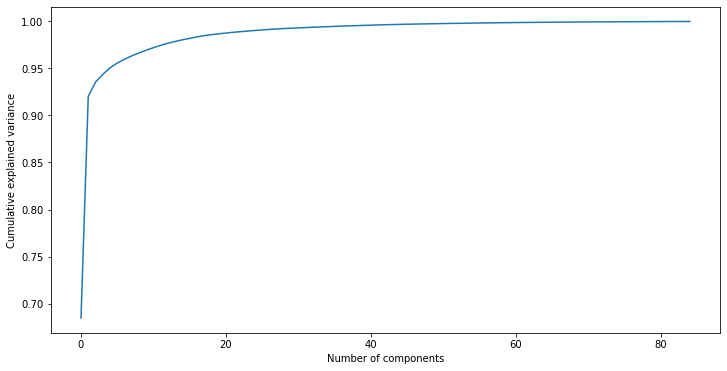

In [22]:
from sklearn.decomposition import PCA

pca_components = 85

pca = PCA(n_components = pca_components)
data = df.iloc[:, :-1].values
dt = pca.fit_transform(data)

ev=pca.explained_variance_ratio_

plt.figure(figsize=(12, 6))
plt.plot(np.cumsum(ev))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

plt.show()

In [23]:
pca_components = 40

pca = PCA(n_components = pca_components)
dt = pca.fit_transform(df.iloc[:, :-1].values)
q = pd.concat([pd.DataFrame(data = dt), pd.DataFrame(data = y.ravel())], axis = 1)
q.columns = [f'PC-{i}' for i in range(1, pca_components+1)]+['class']
q.head()

,PC-1,PC-2,PC-3,PC-4,PC-5,PC-6,PC-7,PC-8,PC-9,PC-10,...,PC-32,PC-33,PC-34,PC-35,PC-36,PC-37,PC-38,PC-39,PC-40,class
0,5014.905985,1456.863260,72.697049,71.204925,-435.686989,-68.840254,134.809769,-304.372189,256.433007,-66.630772,...,17.283159,-2.593206,23.690285,-24.009025,-30.799105,-34.818738,-16.096836,52.420458,5.939910,3
1,5601.383743,-2023.450087,350.134661,-528.465053,148.088292,-288.358979,202.956785,240.848236,-474.857810,93.493990,...,97.862304,-81.795697,-48.163252,27.546974,10.857760,18.202331,-4.879284,9.687433,39.247120,3
2,5796.135442,-3090.394852,490.539929,-760.214347,259.933299,-131.611134,172.927219,205.911380,572.491929,-191.621845,...,34.710782,-38.525492,-13.174303,17.993596,33.814696,18.003436,-19.074935,-38.614909,81.945077,3
3,5586.204575,-2369.376085,356.274719,-502.687155,146.554949,-306.679297,251.071020,234.966532,-314.023196,54.962401,...,125.766707,-65.769877,36.635766,18.432325,64.932908,12.351185,-50.860627,-2.908357,56.019168,3
4,5020.990792,339.603390,-23.007525,-92.556769,-368.495442,-438.266714,502.715375,-345.536650,-188.352763,-67.506005,...,-84.626428,73.271298,185.324352,-12.385449,-16.518061,5.724175,-5.869159,63.279466,14.699786,3


### 可视化PCA之后的光谱图

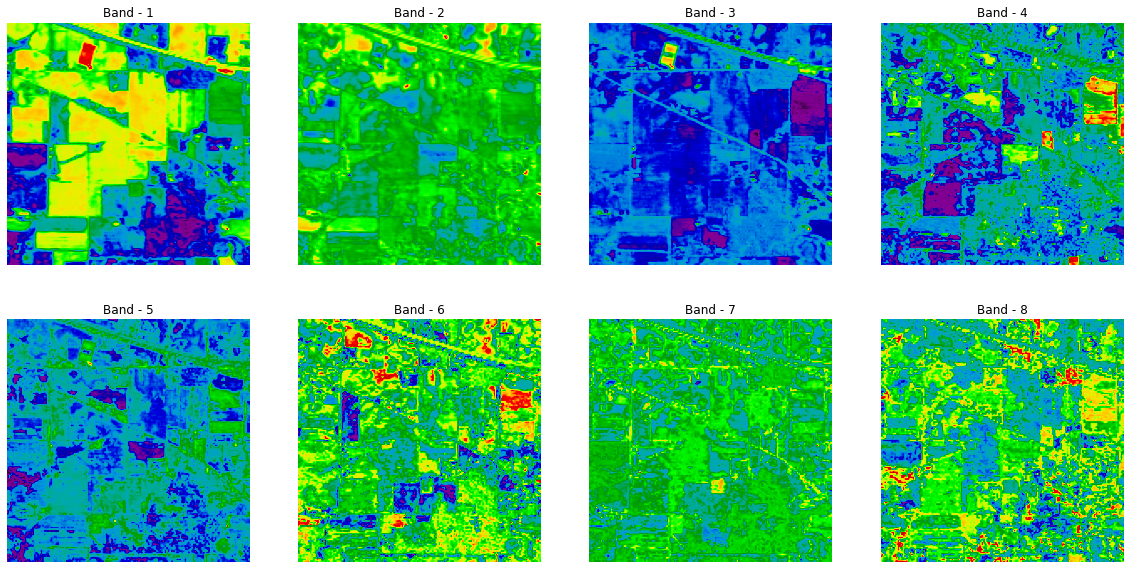

In [24]:
fig = plt.figure(figsize = (20, 10))

for i in range(1, 1+8):
    fig.add_subplot(2,4, i)
    plt.imshow(q.loc[:, f'PC-{i}'].values.reshape(145, 145), cmap='nipy_spectral')
    plt.axis('off')
    plt.title(f'Band - {i}')

plt.savefig('IP_PCA_Bands.png')

In [25]:
# saving to .csv
q.to_csv('IP_40_PCA.csv', index=False)

## SVM

In [26]:
x = q[q['class'] != 0]
X = x.iloc[:, :-1].values
y = x.loc[:, 'class'].values 

names = ['Alfalfa', 'Corn-notill', 'Corn-mintill', 'Corn', 'Grass-pasture', 'Grass-trees',
         'Grass-pasture-mowed', 'Hay-windrowed', 'Oats', 'Soybean-notill', 'Soybean-mintill',
         'Soybean-clean', 'Wheat', 'Woods', 'Buildings Grass Trees Drives', 'Stone Steel Towers']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=11, stratify=y)

svm = SVC(C=100, kernel='rbf', cache_size=10*1024)
svm.fit(X_train, y_train)
ypred = svm.predict(X_test)

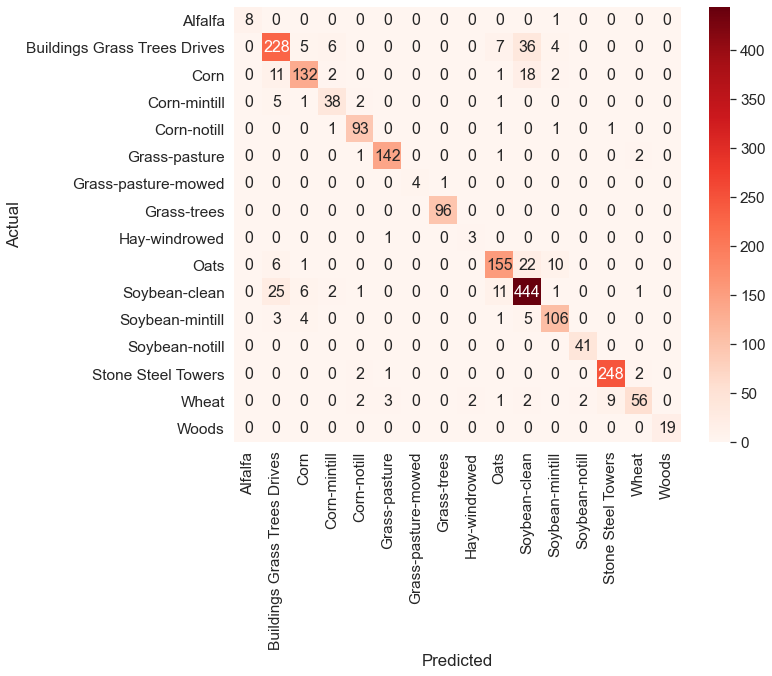

In [27]:
data = confusion_matrix(y_test, ypred)
df_cm = pd.DataFrame(data, columns=np.unique(names), index = np.unique(names))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'

plt.figure(figsize = (10,8))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Reds", annot=True,annot_kws={"size": 16}, fmt='d')

plt.savefig('cmap.png', dpi=300)

In [28]:
print(classification_report(y_test, ypred, target_names = names))

                              precision    recall  f1-score   support

                     Alfalfa       1.00      0.89      0.94         9
                 Corn-notill       0.82      0.80      0.81       286
                Corn-mintill       0.89      0.80      0.84       166
                        Corn       0.78      0.81      0.79        47
               Grass-pasture       0.92      0.96      0.94        97
                 Grass-trees       0.97      0.97      0.97       146
         Grass-pasture-mowed       1.00      0.80      0.89         5
               Hay-windrowed       0.99      1.00      0.99        96
                        Oats       0.60      0.75      0.67         4
              Soybean-notill       0.87      0.80      0.83       194
             Soybean-mintill       0.84      0.90      0.87       491
               Soybean-clean       0.85      0.89      0.87       119
                       Wheat       0.95      1.00      0.98        41
                   

<ipython-input-29-eee49d3a1e51>:9: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



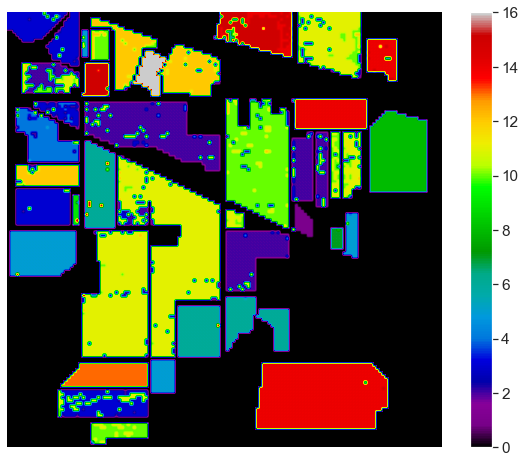

In [29]:
# Classification Map
l=[]
for i in range(q.shape[0]):
    if q.iloc[i, -1] == 0:
        l.append(0)
    else:
        l.append(svm.predict(q.iloc[i, :-1].values.reshape(1, -1)))

clmap = np.array(l).reshape(145, 145).astype('float')
plt.figure(figsize=(10, 8))
plt.imshow(clmap, cmap='nipy_spectral')
plt.colorbar()
plt.axis('off')
plt.savefig('IP_cmap.png')
plt.show()

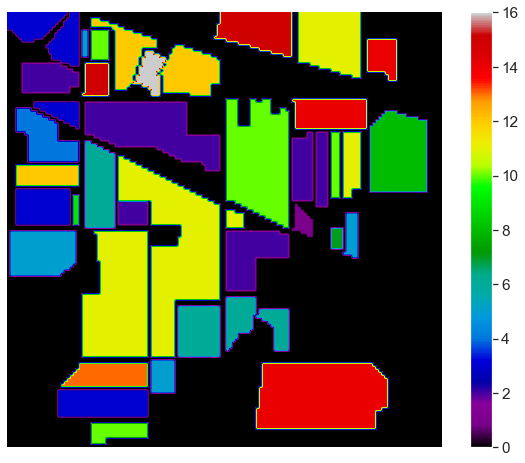

In [52]:
# 真实数据

plt.figure(figsize=(10, 8))
plt.imshow(y, cmap='nipy_spectral')
plt.colorbar()
plt.axis('off')
plt.savefig('IP_cmap.png')
plt.show()

## 可视化

In [30]:
class_labels = {'1':'Alfalfa',
                '2':'Corn-notill',
                '3':'Corn-mintill',
                '4':'Corn',
                '5':'Grass-pasture',
                '6':'Grass-trees',
                '7':'Grass-pasture-mowed',
                '8':'Hay-windrowed',
                '9':'Oats',
                '10':'Soybean-notill',
                '11':'Soybean-mintill',
                '12':'Soybean-clean',
                '13':'Wheat',
                '14':'Woods',
                '15':'Buildings-Grass-Trees-Drives',
                '16':'Stone-Steel-Towers',
               }

In [34]:
q2 = q[q['class'] != 0]
# 添加真实标签列：将数值标签映射到对应的真实标签
q2['label'] = q2.loc[:, 'class'].apply(lambda x: class_labels[str(x)])

<ipython-input-34-0a8b1d317e42>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [35]:
q2['label'].value_counts()

Soybean-mintill                 2455
Corn-notill                     1428
Woods                           1265
Soybean-notill                   972
Corn-mintill                     830
Grass-trees                      730
Soybean-clean                    593
Grass-pasture                    483
Hay-windrowed                    478
Buildings-Grass-Trees-Drives     386
Corn                             237
Wheat                            205
Stone-Steel-Towers                93
Alfalfa                           46
Grass-pasture-mowed               28
Oats                              20
Name: label, dtype: int64

In [36]:
q2.head()

,PC-1,PC-2,PC-3,PC-4,PC-5,PC-6,PC-7,PC-8,PC-9,PC-10,...,PC-33,PC-34,PC-35,PC-36,PC-37,PC-38,PC-39,PC-40,class,label
0,5014.905985,1456.863260,72.697049,71.204925,-435.686989,-68.840254,134.809769,-304.372189,256.433007,-66.630772,...,-2.593206,23.690285,-24.009025,-30.799105,-34.818738,-16.096836,52.420458,5.939910,3,Corn-mintill
1,5601.383743,-2023.450087,350.134661,-528.465053,148.088292,-288.358979,202.956785,240.848236,-474.857810,93.493990,...,-81.795697,-48.163252,27.546974,10.857760,18.202331,-4.879284,9.687433,39.247120,3,Corn-mintill
2,5796.135442,-3090.394852,490.539929,-760.214347,259.933299,-131.611134,172.927219,205.911380,572.491929,-191.621845,...,-38.525492,-13.174303,17.993596,33.814696,18.003436,-19.074935,-38.614909,81.945077,3,Corn-mintill
3,5586.204575,-2369.376085,356.274719,-502.687155,146.554949,-306.679297,251.071020,234.966532,-314.023196,54.962401,...,-65.769877,36.635766,18.432325,64.932908,12.351185,-50.860627,-2.908357,56.019168,3,Corn-mintill
4,5020.990792,339.603390,-23.007525,-92.556769,-368.495442,-438.266714,502.715375,-345.536650,-188.352763,-67.506005,...,73.271298,185.324352,-12.385449,-16.518061,5.724175,-5.869159,63.279466,14.699786,3,Corn-mintill


In [37]:
import plotly.express as px
count = q2['class'].value_counts()
bar_fig = px.bar(x=count.index[1:], y=count[1:], labels=class_labels, color=count.index[1:])
bar_fig.update_layout(xaxis = dict(title='Class', 
                                   tickmode='array', 
                                   tickvals=count.index[1:].tolist(), 
                                   tickangle = 45,
                                  ),
                      yaxis = dict(title='count',),
                      showlegend=True
                     )
bar_fig.show()

In [38]:
q2['label'].value_counts().min()

20

In [39]:
# 重采样一部分样本以便可视化
# sampling dataset
sample_size = q2['label'].value_counts().min()
sample = q2.groupby('class').apply(lambda x: x.sample(sample_size))
sample

PC-1         PC-2         PC-3         PC-4         PC-5  \
class                                                                           
1     9667    -659.143345 -1026.004275 -1658.563438  1790.806473   197.776474   
      9666    -382.470434 -1244.015826 -1258.382035  2024.165143  -192.538963   
      9958   -1245.086935  -441.277449 -1530.691941  1888.081056   -76.602289   
      9522     159.750751 -2616.260274 -1258.053633  1867.226949  -853.623752   
      10831   -363.649131 -1956.554759 -1122.427566  1926.480397  -289.737775   
...                   ...          ...          ...          ...          ...   
16    2077   11140.356378 -3603.027257  4317.412652   778.735915   982.051603   
      2511   10471.885578 -1393.529829  4255.726828   732.314750   874.247602   
      2946    9460.792642 -4801.243925  2089.584875  -212.568863   578.496861   
      3090   11182.501757  1280.834291  5295.781439   727.062279  1320.814429   
      3529   10528.344284  -565.783944  4783.687763   795.645875  1120.178227   

                   PC-6        PC-7        PC-8        PC-9       PC-10  ...  \
class                                                                    ...   
1     9667   585.480733   29.859150  485.423334   -1.297758 -704.303780  ...   
      9666   441.340371 -219.074765  542.964734 -402.964787 -726.911978  ...   
      9958   470.312378  288.139642  598.174257  -32.658239  441.177039  ...   
      9522  -256.932851    7.729758  457.369172 -318.994792 -328.462520  ...   
      10831  290.923479 -319.774375  552.769201 -587.075797 -604.462912  ...   
...                 ...         ...         ...         ...         ...  ...   
16    2077  -121.487930  486.409390 -411.155141  705.892053 -309.040771  ...   
      2511   280.131093  -26.190140 -334.119015  572.415022  -83.848188  ...   
      2946  -324.837180  395.795253  321.502845  599.930489 -317.789858  ...   
      3090   416.841838 -107.294444 -353.443540  514.818505  -10.889193  ...   
      3529   333.369543  -75.578666 -312.174416  701.961482 -130.005898  ...   

                  PC-33       PC-34       PC-35       PC-36       PC-37  \
class                                                                     
1     9667  -159.919745  -26.105704 -240.494850  147.352820 -362.000664   
      9666   162.395165  -11.054391   73.422353  -57.281689  -23.878220   
      9958    54.800238  158.879948    3.704201  -97.553938  -18.176156   
      9522   -46.290436  -59.899642   24.319636  -50.929322   65.760118   
      10831  123.739959   85.344698   33.541036  -14.449165  -81.924821   
...                 ...         ...         ...         ...         ...   
16    2077    32.470944  155.570527   44.458792  -21.714480  -33.778825   
      2511  -492.409851  164.605115  158.665723    9.401808   38.991098   
      2946    99.092320  126.470995  -20.869624  -64.580977 -118.746695   
      3090   865.587435  -70.785933 -193.087100    4.956601  -98.147688   
      3529  -140.869264  298.948148   83.346436   -5.678516  -57.945968   

                  PC-38      PC-39       PC-40  class               label  
class                                                                      
1     9667   179.525203  62.591829 -120.192235      1             Alfalfa  
      9666    15.259709 -28.341154 -102.216344      1             Alfalfa  
      9958   -10.963731  11.083561 -129.378893      1             Alfalfa  
      9522   321.033665  61.278672 -217.761468      1             Alfalfa  
      10831  -17.467905  58.642971  -89.397503      1             Alfalfa  
...                 ...        ...         ...    ...                 ...  
16    2077   -69.674359 -58.006009 -228.320143     16  Stone-Steel-Towers  
      2511  -252.905957 -19.662065 -259.182981     16  Stone-Steel-Towers  
      2946   -52.326131  -4.553303  -25.036514     16  Stone-Steel-Towers  
      3090   149.751492 -94.443344  -52.606049     16  Stone-Steel-Towers  
      3529  -114.808138  89.176164   2

In [40]:
# !pip install chart_studio
# import chart_studio.plotly as py

In [41]:
fig = px.scatter(sample, x="PC-1", y="PC-2", size="class", color="label",
                 hover_name="label", log_x=True, size_max=12)
fig.show()

In [42]:
# Box Plot
fig = px.violin(sample, y="PC-1", x="PC-2", color="label", 
                      box=True, points="all", hover_data=['PC-1', 'PC-2', 'PC-3','label'])
fig.show()

In [43]:
scatter_3d = px.scatter_3d(sample, x="PC-1", y="PC-2", z="PC-3", 
                           color="label", size="class", hover_name="label",symbol="label")
# color_discrete_map = {"Joly": "blue", "Bergeron": "green", "Coderre":"red"})
scatter_3d.show()
# py.plot(scatter_3d, filename = 'scatter_3d', auto_open=True)

堆叠面积图适用于可视化“部分-整体”的关系，这有助于展现各分类及总体的发展趋势和相互之间的关系。

层叠面积图上最大的面积代表了所有数据量的总和，是一个整体。各个叠起来的面积表示各个数据量的大小，这些堆叠起来的面积图在表现大数据的总分量的变化情况时格外有用，所以层叠面积图非常适用于对比多变量随时间变化的情况。层叠面积图并不能反映总量的变化，但是可以清晰的反应每个数值所占百分比随时间或类别变化的趋势线，这对于分析自变量是大数据、时变数据、有序数据时各个指标分量占比极为有用。


> ref:https://www.edrawsoft.cn/what-is-area-chart/mianjitu

In [44]:
area_plt1 = px.area(sample, x="PC-1", y="PC-2", color="label", line_group="label")
area_plt1.show()
# py.plot(area_plt1, filename = 'area_plt1', auto_open=True)

In [45]:
area_plt2 = px.area(sample, x="PC-1", y="PC-3", color="label", line_group="label")
area_plt2.show()
# py.plot(area_plt2, filename = 'area_plt2', auto_open=True)

In [46]:
area_plt3 = px.area(sample, x="PC-2", y="PC-3", color="label", line_group="label")
area_plt3.show()
# py.plot(area_plt3, filename = 'area_plt2', auto_open=True)

In [47]:
pair = px.scatter_matrix(sample, dimensions=["PC-1", "PC-2", "PC-3"], color="label")
pair.show()
# py.plot(pair, filename = 'pair_plot_pc', auto_open=True)